In [16]:
#module

import numpy as np
import matplotlib.pyplot as plt
import itertools
import datetime





In [17]:
def draw_city_graph(coord_cities, solutions=None):

    # Draw highlighted edges for each road
    if solutions is not None:
        # Extended color palette
        colors = itertools.cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
                                  'tab:gray', 'tab:olive', 'tab:cyan'])

        for route in solutions:
            highlighted_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
            highlighted_edges = [tuple(edge) for edge in highlighted_edges]
            # Get the next color in the iterable
            color = next(colors)  
            for edge in highlighted_edges:
                x = [coord_cities[edge[0]][0], coord_cities[edge[1]][0]]
                y = [coord_cities[edge[0]][1], coord_cities[edge[1]][1]]
                plt.plot(x, y, color=color, linewidth=2)

    # Drawing nodes
    x = [coord[0] for coord in coord_cities.values()]
    y = [coord[1] for coord in coord_cities.values()]
    plt.scatter(x, y, s=10, c='k')

    plt.xlim(0, 90)  # X-axis values (x)
    plt.ylim(0, 250)  # Y-axis values (y)

    plt.axis('on')  # Show chart scale
    plt.show()
def draw_city_graph_gif(iteration, coord_cities, solutions=None):
          
    # Draw highlighted edges for each road
    if solutions is not None:
        # Extended color palette
        colors = itertools.cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
                                  'tab:gray', 'tab:olive', 'tab:cyan'])

        for route in solutions:
            highlighted_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
            highlighted_edges = [tuple(edge) for edge in highlighted_edges]
            # Get the next color in the iterable
            color = next(colors)  
            for edge in highlighted_edges:
                x = [coord_cities[edge[0]][0], coord_cities[edge[1]][0]]
                y = [coord_cities[edge[0]][1], coord_cities[edge[1]][1]]
                plt.plot(x, y, color=color, linewidth=2)

    # Drawing nodes
    x = [coord[0] for coord in coord_cities.values()]
    y = [coord[1] for coord in coord_cities.values()]
    plt.scatter(x, y, s=10, c='k')

    plt.xlim(0, 90)  # X-axis values (x)
    plt.ylim(0, 250)  # Y-axis values (y)

    plt.axis('on')  # Show chart scale
    plt.savefig(f"gif/iteration_{iteration}.png")  # save the current figure
    

In [18]:

def generate_city_distances(file_path):
    
    city_coordinates = {}

    with open(file_path, 'r') as file:
        lines = file.readlines()

    start_index = lines.index("NODE_COORD_SECTION\n") + 1
    end_index = lines.index("EOF\n")

    for line in lines[start_index:end_index]:
        parts = line.split()
        node = str(parts[0])
        x = int(parts[1])
        y = int(parts[2])
        city_coordinates[node] = (x, y)


    cities = list(city_coordinates.keys())
    
    # Calculation of distances between cities
    city_distances = {}
    for city1 in cities:
        city_distances[city1] = {}
        for city2 in cities:
            if city1 == city2:
                # Null distance for the same city (ignored in the graph)
                distance = float('inf')  
                
            else:
                distance = calculate_distance(city_coordinates[city1], city_coordinates[city2])
                
                    
            city_distances[city1][city2] = distance
    

    
    return city_distances, city_coordinates


def calculate_distance(coord1, coord2):
    # Calculation of the Euclidean distance between two coordinates
    x1, y1 = coord1
    x2, y2 = coord2
    distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return int(distance)



In [19]:
def generate_nearest_neighbor_individual(city_distances,  nbrCamions):
        cities = list(city_distances.keys())
        # Initialize the truck to the starting city
        individual = [[cities[0]] for _ in range(nbrCamions)]
        cities_copy = cities[1:]  # Crée une copie des villes à visiter
        # iteration = 0
        # Assign cities to each truck until there are none left
        while cities_copy:
            for i in range(nbrCamions):
                if cities_copy:  # s'il reste des villes à assigner
                    current_city = individual[i][-1]
                    nearest_city = min(cities_copy, key=lambda city: city_distances[current_city][city])
                    individual[i].append(nearest_city)
                    cities_copy.remove(nearest_city)
                # draw_city_graph_gif(iteration, coord_cities, individual)
                # iteration+=1
        # Add the departure city at the end of each route
        for i in range(nbrCamions):
            individual[i].append(cities[0])

        return individual




Execution time = 0.000997
End solution :
  Max weights: 870
  Min weights: 833
  Sum weights: 1703
  Difference max-min: 37


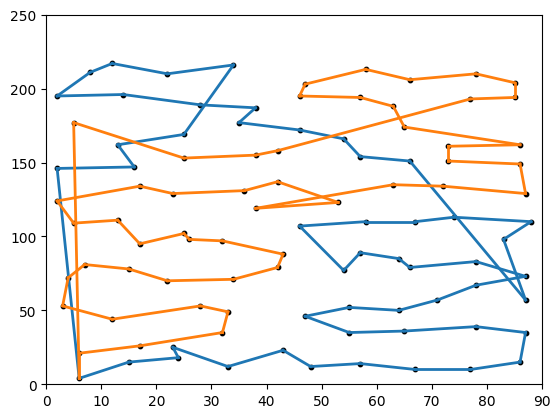

Execution time = 0.000998
End solution :
  Max weights: 771
  Min weights: 681
  Sum weights: 2214
  Difference max-min: 90


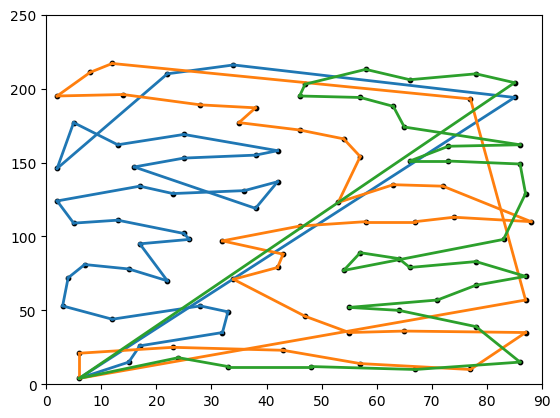

Execution time = 0.000998
End solution :
  Max weights: 639
  Min weights: 546
  Sum weights: 2917
  Difference max-min: 93


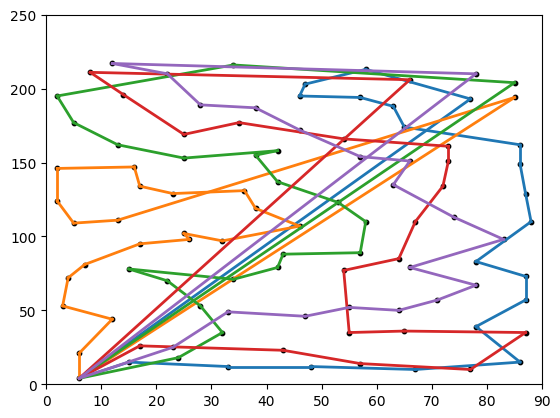

Execution time = 0.000998
End solution :
  Max weights: 539
  Min weights: 454
  Sum weights: 3476
  Difference max-min: 85


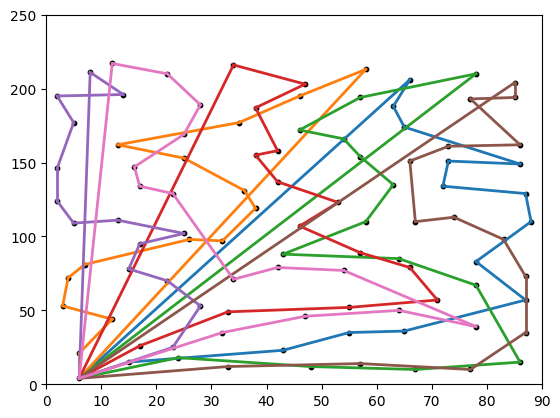

In [20]:
# Model Parameters
nbrCamions = [2, 3, 5, 7]
# must be greater than 2*nbrTrucks+1
num_cities = 99  
file_path="data/rat99.tsp"
for nbrCamions in nbrCamions:
    city_distances, coord_cities = generate_city_distances(file_path)

    max_weights = []
    min_weights = []
    sum_weights = []
    start_date = datetime.datetime.now()
    best_solution = generate_nearest_neighbor_individual(city_distances, nbrCamions)
    stop_date = datetime.datetime.now()
    delta = (stop_date - start_date).total_seconds()
    print("Execution time =", delta)
    total_weights = []
    for route in best_solution:
        total_weight = 0
        for i in range(len(route) - 1):
            city1 = route[i]
            city2 = route[i + 1]
            total_weight += city_distances[city1][city2]
        total_weights.append(total_weight)

    max_weights.append(max(total_weights))
    min_weights.append(min(total_weights))
    sum_weights.append(sum(total_weights))

    print("End solution :")
    print("  Max weights:", max(total_weights))
    print("  Min weights:", min(total_weights))
    print("  Sum weights:", sum(total_weights))
    print("  Difference max-min:", max(total_weights) - min(total_weights))
    

    draw_city_graph(coord_cities, best_solution)


    plt.show()
